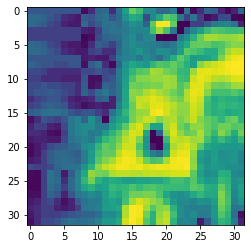

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[11]
Right-of-way at the next intersection


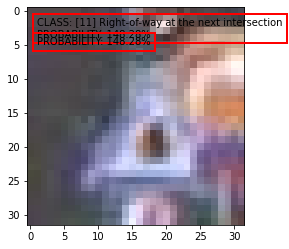

In [10]:
import numpy as np
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras as kr
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

imgOriginal = cv2.imread("/content/drive/MyDrive/data/mydata/11/00000_00000.jpg")
labels=pd.read_csv('/content/drive/MyDrive/data/labels.csv')

frameWidth= 640         
frameHeight = 480
brightness = 180
threshold = 0.75         
font = cv2.FONT_HERSHEY_SIMPLEX

cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
# # IMPORT THE TRANNIED MODEL
pickle_in="/content/M.h5"  
model=load_model(pickle_in)

def grayscale(img):
   img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
   return img
def equalize(img):
   img = cv2.equalizeHist(img)
   return img
def preprocessing(img):
   img = grayscale(img)
   img = equalize(img)
   img = img/255
   return img

def getCalssName(classNo):
   return labels.loc[labels['ClassId']==classNo[0],'Name'].values[0]

success, imgOrignal = cap.read()
img = np.array(imgOrignal)
img = cv2.resize(imgOriginal, (32, 32))
img = preprocessing(img)
plt.imshow(img)
plt.show()

img = img.reshape(1, 32, 32, 1)
cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)

predictions = model.predict(img)
classIndex = model.predict_classes(img)
probabilityValue =np.amax(predictions)
if probabilityValue > threshold:
    print(classIndex)
    print(getCalssName(classIndex))
    plt.text(1, 1, f"CLASS: {classIndex} {getCalssName(classIndex)}\nPROBABILITY: {round(probabilityValue*150,2)}%" ,ha="left",va="top", bbox=dict(fill=False, edgecolor='red', linewidth=2))
    plt.text(1, 5, f"PROBABILITY: {round(probabilityValue*150,2)}%", bbox=dict(fill=False, edgecolor='red', linewidth=2))

plt.imshow(imgOriginal)
plt.savefig('imgOriginal')
plt.show()